In [1]:
import warnings
warnings.filterwarnings('ignore')

#   data manipulation
import pandas as pd
import numpy as np

#   data prepocessing
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, RobustScaler, MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
import category_encoders as ce

from category_encoders import BinaryEncoder

#   model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#   ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm.sklearn import LGBMClassifier
from catboost import CatBoostClassifier

#   model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate, StratifiedKFold

#   pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imb_pipeline

#   metric
from sklearn.metrics import classification_report, make_scorer, f1_score, precision_score, recall_score, fbeta_score, roc_auc_score, confusion_matrix, accuracy_score
from imblearn.metrics import classification_report_imbalanced

#   visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#   balancing
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTEN, ADASYN, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour
from imblearn.combine import SMOTEENN, SMOTETomek

#   cek multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Context :**

Perusahaan telekomunikasi merupakan salah satu industri yang paling penting di dunia. Terutama pada era digital yang semakin maju, persaingan di industri telekomunikasi seluler semakin ketat. Salah satu tantangan yang dihadapi provider adalah mempertahankan pelanggan agar tidak beralih ke provider lain. Dikutip dari B2B NPS dan CX Benchmarks CustomerGauge, industri telekomunikasi memiliki tingkat retensi rata-rata sekitar 69%. Meskipun angka ini belum termasuk yang paling rendah (tingkat retensi di industri grosir hanya sekitar 44%), masih ada kesempatan untuk meningkatkan performa dalam hal mempertahankan pelanggan [(sumber)](https://customergauge.com/blog/reducing-customer-churn-in-telecommunications#5%20Reasons%20Why%20Churn%20in%20Telecoms%20Is%20So%20High3). 

Sebagai seorang data science, kita diminta untuk membuat model prediksi menggunakan machine learning untuk mengetahui apakah pelanggan akan beralih atau tidak. Perusahaan telekomunikasi dapat memanfaatkan teknologi [machine learning](https://neptune.ai/blog/how-to-implement-customer-churn-prediction#:~:text=Predicting%20churn%20is%20a%20good,to%20identify%20and%20predict%20churn.) ini untuk mengenali pelanggan yang mungkin memutuskan langganan. Dengan demikian, upaya retensi dapat diarahkan secara lebih tepat kepada pelanggan-pelanggan tersebut.

Target :

0 : berlangganan

1 : Berhenti berlangganan (churn)

**Problem Statement  :**

Perusahaan telekomunikasi yang memiliki persentase churn yang tinggi berisiko mengalami kegagalan. Oleh karena itu, perlu dilakukan upaya untuk mengurangi persentase churn tersebut. Perusahaan umumnya lebih memilih untuk mempertahankan pelanggan, karena biaya yang dibutuhkan untuk mempertahankan pelanggan lebih rendah daripada biaya untuk memperoleh pelanggan baru. Berdasarkan [penelitian](https://www.outboundengine.com/blog/customer-retention-marketing-vs-customer-acquisition-marketing/), biaya untuk memperoleh pelanggan baru dapat lima kali lebih tinggi daripada biaya untuk mempertahankan pelanggan yang sudah ada. Biaya customer acquisition cost untuk industri telekomunikasi rata-rata adalah sekitar $315 [(sumber)](https://www.revechat.com/blog/customer-acquisition-cost/) per new customer.

Untuk mempertahankan pelanggan, perusahaan telekomunikasi dapat memberikan insentif retensi seperti potongan harga, paket layanan yang menarik, prioritas pelayanan, dan lain-lain. Namun, kebijakan pemberian insentif retensi belum sepenuhnya efektif. Hal ini dikarenakan insentif retensi yang diberikan secara merata kepada seluruh pelanggan akan menjadi tidak efektif dan mengurangi potensi keuntungan, terutama jika pelanggan tersebut memang loyal dan tidak ingin berhenti berlangganan.

**Goals :**

Oleh karena itu, perusahaan telekomunikasi ingin memiliki kemampuan untuk memprediksi kemungkinan pelanggan akan berhenti berlangganan. Perusahaan juga ingin mengetahui faktor-faktor yang menyebabkan pelanggan berhenti berlangganan. Dengan mengetahui faktor-faktor tersebut, perusahaan dapat melakukan tindakan untuk mencegah pelanggan berhenti berlangganan.

**Metric Evaluation :**

Target utama kami adalah untuk mengidentifikasi pelanggan yang akan berhenti berlangganan. Oleh karena itu, kami menetapkan target sebagai berikut:

Target :

0: Pelanggan yang tidak akan berhenti berlangganan
1: Pelanggan yang akan berhenti berlangganan (churn)

**Kesalahan Tipe 1 (False Positive)**: Pelanggan yang aktualnya tidak akan berhenti berlangganan tetapi diprediksi akan berhenti berlangganan. Konsekuensinya adalah pemberian insentif retensi yang tidak efektif.

**Kesalahan Tipe 2 (False Negative)**: Pelanggan yang aktualnya akan berhenti berlangganan tetapi diprediksi tidak akan berhenti berlangganan. Konsekuensinya adalah kehilangan pelanggan.

Untuk memberikan gambaran yang lebih jelas tentang konsekuensinya, kita akan mencoba menghitung dampak biayanya dengan menggunakan asumsi-asumsi berikut:
1. CLTV for churn customer = 1 / churn rate, sedangkan churn rate untuk industri telekomunikasi berada di range [20% - 40%](https://www.mdpi.com/2076-3417/11/11/4742#B1-applsci-11-04742), jadi CLTV untuk pelanggan yang churn sekitar 1/20% atau 5 bulan
2. Customer Acquisition Cost (CAC) = [315$](https://www.revechat.com/blog/customer-acquisition-cost/) / 5 = $63 perbulan untuk tiap customernya
3. Customer Retention Cost (CRC) = [1/5](https://www.outboundengine.com/blog/customer-retention-marketing-vs-customer-acquisition-marketing/) * CAC = 1/5 * $63 --> $12.6 perbulan untuk tiap customernya
4. Average Customer MonthlyCharge = $64.88 per bulan untuk tiap customernya (diambil dari statistik deskriptif dataset)


Dengan mengambil asumsi diatas sebagai dasar, kita dapat mencoba mengukur konsekuensinya seperti berikut:
1. Pemberian insentif retensi yang tidak efektif dapat mengakibatkan pemborosan biaya CRC sebesar $12.6 perbulan untuk tiap customer
2. Ketika pelanggan pergi, itu berarti pendapatan turun dan kita harus mengeluarkan biaya lagi untuk akuisisi pelanggan baru, sehingga secara keseluruhan kita mengalami kerugian sebesar $63 + $64.88 = $127.88

Berdasarkan pertimbangan konsekuensinya, maka kita akan berusaha untuk membuat model yang dapat mengurangi jumlah pelanggan yang beralih dari perusahaan tersebut, khususnya pelanggan yang sebenarnya akan beralih tetapi diprediksi tidak akan beralih (False Negative). Selain itu, model tersebut juga harus dapat meminimalisir pemberian insentif yang tidak tepat. Oleh karena itu, metric utama yang akan kita gunakan adalah f2_score, karena kita menganggap recall dua kali lebih penting daripada precision.

In [2]:
#   membuat f2 score
f2 = make_scorer(fbeta_score, beta=2)

# 1. Data Understanding

Langkah pertama yang akan kita lakukan adalah mempelajari dataset yang tersedia. Data tersebut dapat diakses [disini](https://drive.google.com/file/d/1oB5uKtJr7dWcWr9Ld5ZFAuVkpV005ceH/view).

In [3]:
dfa = pd.read_csv(r"C:\Users\moh_y\python_project\bootcamp\modul_3\capstone\data_telco_customer_churn.csv")
dfa.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [4]:
#   menampilkan nilai dan value unique yang ada pada setiap kolomnya

pd.set_option('display.max_colwidth', None)
listItem = []
for col in dfa.columns :
    listItem.append( [col, dfa[col].nunique(), dfa[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


In [5]:
#  untuk menampilkan ringkasan statistik dari DataFrame `df`

dfa.describe(include='all')

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
count,4930,4930.000000,4930,4930,4930,4930,4930,4930,4930,4930.000000,4930
unique,2,NaN,3,3,3,3,3,3,2,NaN,2
top,No,NaN,No,No,Fiber optic,No,No,Month-to-month,Yes,NaN,No
freq,3446,NaN,2445,2172,2172,2186,2467,2721,2957,NaN,3614
mean,NaN,32.401217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.883032,NaN
std,NaN,24.501193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.923960,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.800000,NaN
25%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.050000,NaN
50%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [6]:
# Menampilkan informasi ringkas tentang DataFrame. Informasi yang ditampilkan meliputi:

# 1. Jumlah baris dan kolomnya
# 2. Tipe data setiap kolomnya
# 3. Jumlah nilai non-null di setiap kolomnya
# 4. Memori yang digunakan untuk menyimpan DataFrame

dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


# 2. Data Cleaning dan Analisis

Tahap selanjutnya ada menghapus data duplikat. Adanya duplikat dapat menyebabkan bias dalam evaluasi model. Serta Kehadiran duplikat dapat membuat proses [training dan evaluasi](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) model menjadi kurang efisien.

In [7]:
#   menghapus nilai duplicated yang ada

print(f"jumlah nilai duplikat yang ada = {dfa.duplicated().sum()}")

df = dfa.drop_duplicates()

jumlah nilai duplikat yang ada = 77


Cek Missing Value

In [8]:
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

Tidak terdapat Missing Values pada dataset. Sehingga kita tidak perlu menangani missing values.

Jika kita perhatikan fitur `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, dan `TechSupport`, kita akan menemukan nilai unik '**No internet service**' selain dari '**Yes**' dan '**No**'. Pada dasarnya, data dengan nilai '**No internet service**' dalam kolom-kolom tersebut memiliki arti yang serupa dengan nilai '**No**'. Hal ini disebabkan karena ketika pelanggan tidak menggunakan layanan `InternetService`, mereka juga tidak menggunakan layanan `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, dan `TechSupport`, seperti yang dapat dilihat dalam tabel di bawah (tidak ada nilai '**Yes**').

In [9]:
# mengecek penggunaan layanan `OnlineSecurity, OnlineBackup, DeviceProtection` dan `TechSupport` ketika 'No' InternetService
df_no_internet = df[df['InternetService']=='No']

listItem = []
for col in df_no_internet.columns[2:7] :
    listItem.append( [col, df_no_internet[col].nunique(), df_no_internet.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,OnlineSecurity,1,[No internet service]
1,OnlineBackup,1,[No internet service]
2,InternetService,1,[No]
3,DeviceProtection,1,[No internet service]
4,TechSupport,1,[No internet service]


Oleh karenanya kita dapat ubah nilai '**No internet service**' menjadi '**No**' pada kolom OnlineSecurity, OnlineBackup, DeviceProtection dan TechSupport

In [10]:
#   mengubah 'No internet service' menjadi 'No' pada dataframe
#   dikarenakan "No internet service" sama saja seperti No   

df = df.replace('No internet service','No')

Mari kita konversi nilai pada kolom Churn dari '**Yes**' dan '**No**' menjadi **1** dan **0** terlebih dahulu. Karena perhatian utama kita tertuju pada pelanggan yang berpindah, maka :

Target :

0 : Tidak berhenti berlangganan (Churn == 'No')

1 : Berhenti berlangganan (Churn == 'Yes')

In [11]:
#   mengganti nilai churn yes menjadi 1

df['Churn'] = np.where(df['Churn']=='Yes', 1, 0)

Dapat kita lihat dari grafik batang dibawah ini. Data yang kita miliki tidak merata (imbalance), karena hanya 27% dari data tersebut termasuk ke dalam kelas minoritas. Untuk mengatasi hal ini, kita akan menerapkan metode resampling untuk membuat distribusi kelas di data kita menjadi lebih merata.

Presentase Churn
0    73.0
1    27.0
Name: count, dtype: float64


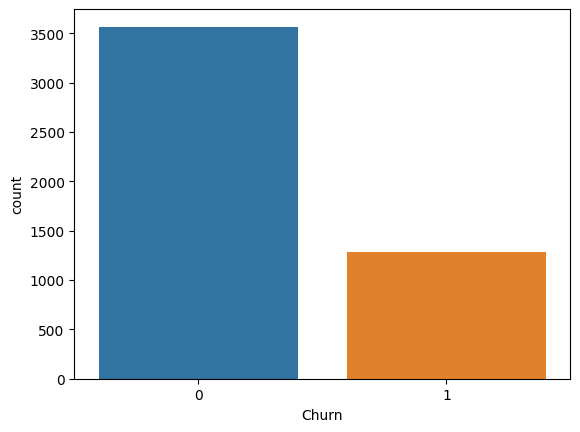

In [12]:
print(f"Presentase {(df['Churn'].value_counts() / len(df)).round(2)*100}")

sns.countplot(x=df['Churn'])
plt.show()

Tahap selanjutnya adalah mengecek nilai outlier yang ada didalam dataset. Outlier sendiri dapat berdampak negatif pada model seperti,
[Menurunkan akurasi model](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/), Meningkatkan bias model dan etc.

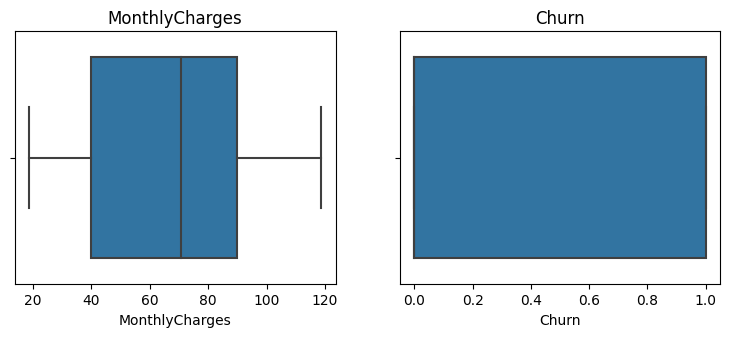

In [13]:
# Cek outliers di kolom MonthlyCharges

col_names = df.drop(columns=['tenure']).describe().columns

plot_number = 1

plt.figure(figsize=(24,19))
for kolom in col_names:
    plt.subplot(5,5, plot_number)
    sns.boxplot(data=df, x=kolom)
    plt.title(kolom)

    plot_number +=1

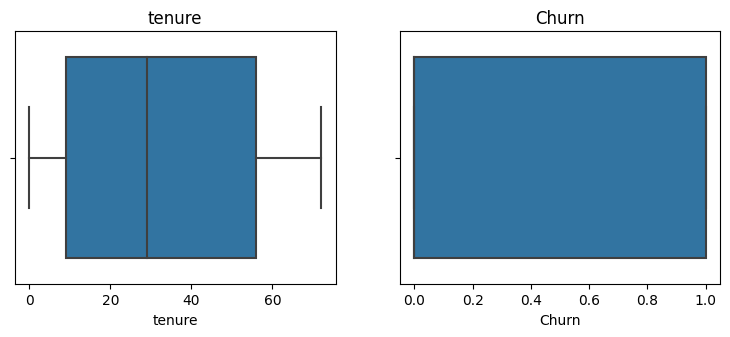

In [14]:
# Cek outliers di kolom tenure

col_names = df.drop(columns=['MonthlyCharges']).describe().columns

plot_number = 1

plt.figure(figsize=(24,19))
for kolom in col_names:
    plt.subplot(5,5, plot_number)
    sns.boxplot(data=df, x=kolom)
    plt.title(kolom)

    plot_number +=1

Dapat kita lihat melalui `boxplot` diatas. Tidak ditemukan adanya outlier, oleh karena itu penggunaan teknik scaling seperti [Min-Max Scaling](https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/6009dd9fa7bc363aa822d2c7/1611259312432/ISLR+Seventh+Printing.pdf) dapat menjadi pilihan yang baik.

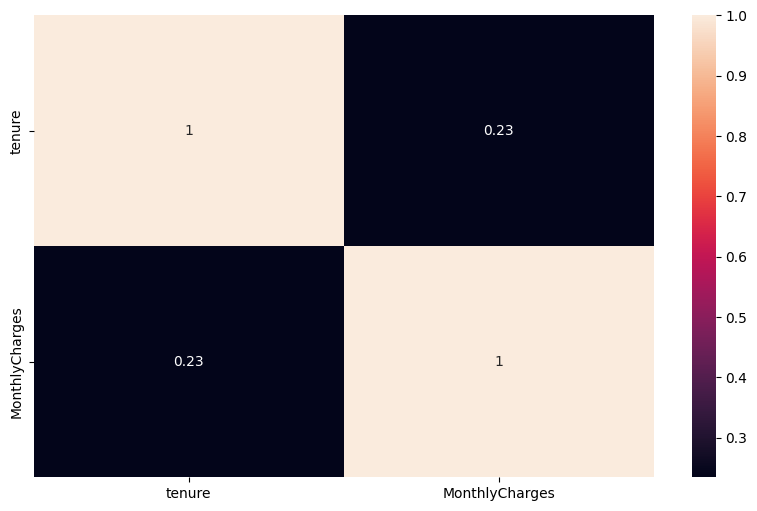

In [15]:
#   mengecek korelasi pada kolom number

plt.figure(figsize=(10,6))
sns.heatmap(df[['tenure','MonthlyCharges']].corr(numeric_only=True), annot = True);

Antara kolom `tenure` dan `MonthlyCharges` memiliki korelasi positif dengan nilai 0.23 yang berarti memiliki hubungan lemah

Data [holdout](https://hastie.su.domains/Papers/ESLII.pdf) adalah praktik menyimpan sebagian kecil data terpisah dari data pelatihan dan validasi yang digunakan selama pencarian model. Fungsi utama dari data holdout adalah memberikan evaluasi yang independen terhadap performa model pada data yang belum pernah dilihat selama proses pelatihan atau validasi.

In [16]:
df , df_hold_up = train_test_split(df, test_size=0.05, random_state=22)

# 3. Data Preparation

Untuk selanjutnya ada membagi data menjadi 2, yaitu sebagai data training dan data testing. Karena data kita imbalance, kita perlu menambahkan parameter `stratify`. Parameter `stratify` pada train_test_split dalam library scikit-learn berfungsi untuk memastikan bahwa pembagian data antara data pelatihan (training set) dan data pengujian (test set) mempertahankan distribusi proporsional dari target variabel atau kategori yang ada.

In [17]:
#   split ke dalam 2 subset (training dan testing)
#   stratify berfungsi untuk menyamakan proporsi 'target' pada data training dan data testing
df_feature = df.drop(columns='Churn')
df_target = df['Churn']

x_train, x_test, y_train, y_test = train_test_split(df_feature, df_target, test_size=0.2, random_state=22, stratify=df_target)

display(y_train.value_counts(normalize=True).round(2),
        y_test.value_counts(normalize=True).round(2),)

Churn
0    0.73
1    0.27
Name: proportion, dtype: float64

Churn
0    0.74
1    0.26
Name: proportion, dtype: float64

## *Encoding*

Encoding adalah proses mengubah data kategorikal menjadi data numerikal. Kita perlu Meng-Encoding dikarenakan Algoritma machine learning umumnya hanya dapat bekerja dengan data numerikal. Oleh karena itu, data kategorikal perlu diubah menjadi data numerikal sebelum dapat digunakan dalam machine learning.

Sekarang, kita akan mengubah format fitur kategorikal dalam dataset kita.

Fitur `Contract` dan `InternetService` akan diubah menjadi integer 1-3 menggunakan **Ordinal Encoding**, karena fitur-fitur ini memiliki urutan.

Fitur `Dependents`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, dan `TechSupport` akan diubah menjadi vektor biner menggunakan **One Hot Encoding**, karena fitur-fitur ini tidak memiliki urutan dan memiliki jumlah nilai unik yang sedikit.

Fitur `PaperlessBilling` akan diubah menjadi vektor biner menggunakan **One Hot Encoding**, meskipun fitur ini memiliki urutan.

Sedangkan untuk fitur numerical seperti `tenure` dan `MonthlyCharges` bisa kita scaling menggunakan **Min-Max Scaling**

In [18]:
# mapping untuk ordinal encoder

ordinal_mapping = [
    {'col':'InternetService', 'mapping':{None:0, 'Fiber optic':3, 'DSL':2, 'No':1}},
    {'col':'Contract', 'mapping':{None:0, 'Month-to-month':3, 'One year':2, 'Two year':1}}
]

In [19]:
method = None

transformer = ColumnTransformer(
    [
     ('scaling', method, ['tenure','MonthlyCharges']),
    #  ('OHE', OneHotEncoder(drop='first'), x_train.select_dtypes('object').columns)
     ('OHE', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']),
     ('ordinal', ce.OrdinalEncoder(cols=['InternetService', 'Contract'], mapping=ordinal_mapping), ['InternetService', 'Contract'])
     ], remainder='passthrough'
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaling', None, ['tenure', 'MonthlyCharges']),
                                ('OHE', OneHotEncoder(drop='first'),
                                 ['Dependents', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'PaperlessBilling']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['InternetService',
                                                      'Contract'],
                                                mapping=[{'col': 'InternetService',
                                                          'data_type': dtype('O'),
                                                          'mapping': None           0
Fiber optic    3
DSL            2
No             1
dtype: int64},
                                                         {'col': 'Contract',
                                                          'data_type': dtype('O'),
                                                          'mapping': None              0
Month-to-month    3
One year          2
Two year          1
dtype: int64}]),
                                 ['InternetService', 'Contract'])])

# 4. Modelling dan Evaluation

`DecisionTreeClassifier`, `LogisticRegression`, dan `KNeighborsClassifier` dipilih untuk metode klasifikasi karena Ketiga metode ini sederhana dan mudah dipahami serta dapat diterapkan pada berbagai jenis data [(sumber)](https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222).

Serta untuk metode ensemble dan boostingnya kita akan menggunakan : `RandomForestClassifier`, `GradientBoostingClassifier`, `AdaBoostClassifier` berdasarkan [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron](https://powerunit-ju.com/wp-content/uploads/2021/04/Aurelien-Geron-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow_-Concepts-Tools-and-Techniques-to-Build-Intelligent-Systems-OReilly-Media-2019.pdf) 

kita juga menggunakan metode [`CatBoostClassifier`](https://papers.nips.cc/paper_files/paper/2018/hash/14491b756b3a51daac41c24863285549-Abstract.html) yang mana juga merupakan Varian dari GBM yang dirancang untuk menangani data kategorikal, serta `XGBClassifier` yang menggunakan algoritma GBDT yang dioptimalkan untuk akurasi. Algoritma ini menggunakan teknik-teknik seperti regularization dan histogram-based split finding untuk meningkatkan kinerja [model](https://xgboost.ai/). , dan `LGBMClassifier` yang mana merupaka framework yang dikembangkan oleh Microsoft. `LGBMClassifier` menggunakan algoritma GBDT yang dioptimalkan untuk kecepatan dan akurasi. Algoritma ini menggunakan teknik-teknik seperti tree pruning dan regularization untuk meningkatkan kinerja [model](https://proceedings.neurips.cc/paper_files/paper/2017/file/6449f44a102fde848669bdd9eb6b76fa-Paper.pdf).



In [20]:
#   model init


logreg = LogisticRegression(random_state=22, class_weight='balanced')
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=22, class_weight='balanced')

cat = CatBoostClassifier(random_state=22)
rf = RandomForestClassifier(random_state=22, class_weight='balanced')

#   boosting
xgb = XGBClassifier(random_state = 22,device='cuda')
gds = GradientBoostingClassifier(random_state=22)
adaboost = AdaBoostClassifier(estimator=LogisticRegression(random_state=22, class_weight='balanced'), random_state=22)
lgbm = LGBMClassifier(random_state=22, class_weight='balanced')

dikarenakan data kita imbalance, kita perlu menambahkan parameter `class_weight='balanced'`

`class_weight='balanced'` pada library machine learning [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html) adalah suatu metode yang digunakan untuk mengatasi masalah class imbalance dalam dataset. Class imbalance terjadi ketika jumlah data untuk setiap kelas dalam dataset memiliki perbedaan yang signifikan. Masalah ini dapat menyebabkan model machine learning cenderung menjadi bias terhadap kelas yang memiliki lebih banyak data, dan mengabaikan kelas yang memiliki data lebih sedikit.

Dengan menggunakan `class_weight='balanced'`, liblary scikit-learn akan secara otomatis menyesuaikan bobot (weight) untuk setiap kelas selama proses pelatihan model. Bobot untuk kelas yang memiliki lebih sedikit data akan ditingkatkan, sehingga model machine learning akan lebih memperhatikan kelas tersebut. Pendekatan ini membantu meningkatkan kinerja model untuk kelas yang memiliki data lebih sedikit, sekaligus mengurangi bias terhadap kelas yang memiliki lebih banyak data.

# Model Benchmark without Sampling

In [21]:
model = None
pipe = imb_pipeline([
    ('prepocessing', transformer),
    ('clf', model)
])

In [22]:
model_search = {
    'clf' : [logreg, knn, dt, cat, rf, xgb, gds, adaboost, lgbm],
    'prepocessing__scaling' : [MinMaxScaler()]
} 

grid_search_cv = GridSearchCV(
    estimator = pipe,
    param_grid = model_search,
    scoring = f2,
    verbose=1,  # setiap proses dikeluarkan
    return_train_score=True,
    cv = StratifiedKFold(),
    n_jobs=-1
)


In [23]:
grid_search_cv.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prepocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling',
                                                                         None,
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling...
                                               num_parallel_tree=None,
                                               random_state=22, ...),
                                 GradientBoostingClassifier(random_state=22),
                                 AdaBoostClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                                                 random_state=22),
                                                    random_state=22),
                                 LGBMClassifier(class_weight='balanced',
                                                random_state=22)],
                         'prepocessing__scaling': [MinMaxScaler()]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=1)

In [24]:
cv_result = pd.DataFrame(grid_search_cv.cv_results_)
cv_result[['params','mean_test_score','mean_train_score','rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,mean_train_score,rank_test_score
7,"{'clf': AdaBoostClassifier(estimator=LogisticRegression(class_weight='balanced', random_state=22), random_state=22), 'prepocessing__scaling': MinMaxScaler()}",0.723442,0.723550,1
0,"{'clf': LogisticRegression(class_weight='balanced', random_state=22), 'prepocessing__scaling': MinMaxScaler()}",0.720966,0.722946,2
8,"{'clf': LGBMClassifier(class_weight='balanced', random_state=22), 'prepocessing__scaling': MinMaxScaler()}",0.687604,0.904190,3
3,"{'clf': <catboost.core.CatBoostClassifier object at 0x00000209AE5DB070>, 'prepocessing__scaling': MinMaxScaler()}",0.554513,0.689031,4
6,"{'clf': GradientBoostingClassifier(random_state=22), 'prepocessing__scaling': MinMaxScaler()}",0.546879,0.621836,5
5,"{'clf': XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, device='cuda', early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, multi_strategy=None, n_estimators=None, n_jobs=None, num_parallel_tree=None, random_state=22, ...), 'prepocessing__scaling': MinMaxScaler()}",0.545736,0.877090,6
1,"{'clf': KNeighborsClassifier(), 'prepocessing__scaling': MinMaxScaler()}",0.514725,0.640196,7
4,"{'clf': RandomForestClassifier(class_weight='balanced', random_state=22), 'prepocessing__scaling': MinMaxScaler()}",0.511185,0.994752,8
2,"{'clf': DecisionTreeClassifier(class_weight='balanced', random_state=22), 'prepocessing__scaling': MinMaxScaler()}",0.506210,0.996181,9


Hasil pengujian menunjukkan bahwa model AdaBoostClassifier dan [LogisticRegression](https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/) memiliki nilai f2score yang paling tinggi di antara model-model lainnya yang menggunakan hyperparameter default tanpa sampling. Hal ini terjadi karena kedua model tersebut menggunakan bobot kelas yang seimbang (class_weight = 'balanced').

# Model Benchmark with Sampling

Langkah selanjutnya, kita akan mencoba cara untuk menyeimbangkan data yang tidak seimbang. Caranya adalah dengan membuat lebih banyak data (Oversampling) untuk kelas yang jumlahnya sedikit. Dengan begitu, model pembelajaran mesin akan lebih mudah memahami pola dan variasi data dalam kelas tersebut.

Metode Oversampling yang kita tentukan ada 3, yaitu RandomOverSampler, SMOTE dan ADASYN

1. RandomOverSampler = metode oversampling yang paling sederhana. Metode ini bekerja dengan menduplikasi sampel dari kelas minoritas secara acak.
2. SMOTE (Synthetic Minority Over-sampling Technique) = metode oversampling yang lebih kompleks daripada RandomOverSampler. Metode ini bekerja dengan membuat sampel sintetis dari kelas minoritas.
3. ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning) = metode oversampling yang merupakan pengembangan metode SMOTE. Metode ini bekerja dengan membuat sampel sintetis dari kelas minoritas dengan cara menyesuaikan jumlah sampel sintetis yang dibuat dengan tingkat kesulitan klasifikasi.

[*sumber 1*](https://imbalanced-learn.org/stable/over_sampling.html)<br>
[*sumber 2*](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)<br>
[*sumber 3*](https://ieeexplore.ieee.org/document/4633969)

## Logistic Regression, KNN, Decision Tree

In [25]:
model = None
pipe_balance = imb_pipeline([
    ('prepocessing', transformer),
    ('sampling', None),
    ('clf', model)
])

In [26]:
model_search = {
    'clf' : [logreg, knn, dt],
    'prepocessing__scaling' : [MinMaxScaler()],
    'sampling' : [RandomOverSampler(random_state=48),
                  SMOTE(random_state=48),
                  ADASYN(random_state=48)
                  ]
} 

grid_search_cv_balance = GridSearchCV(
    estimator = pipe_balance,
    param_grid = model_search,
    scoring = f2,
    verbose=1,  # setiap proses dikeluarkan
    return_train_score=True,
    cv = StratifiedKFold(),
    n_jobs=-1
)


In [27]:
grid_search_cv_balance.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prepocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling',
                                                                         None,
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling...
             param_grid={'clf': [LogisticRegression(class_weight='balanced',
                                                    random_state=22),
                                 KNeighborsClassifier(),
                                 DecisionTreeClassifier(class_weight='balanced',
                                                        random_state=22)],
                         'prepocessing__scaling': [MinMaxScaler()],
                         'sampling': [RandomOverSampler(random_state=48),
                                      SMOTE(random_state=48),
                                      ADASYN(random_state=48)]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=1)

In [28]:
print(f"best score = {grid_search_cv_balance.best_score_}")
grid_search_cv_balance.best_params_

best score = 0.7308106482482198


{'clf': LogisticRegression(class_weight='balanced', random_state=22),
 'prepocessing__scaling': MinMaxScaler(),
 'sampling': ADASYN(random_state=48)}

In [29]:
cv_result = pd.DataFrame(grid_search_cv_balance.cv_results_)
cv_result[['params','mean_test_score','mean_train_score','rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,mean_train_score,rank_test_score
2,"{'clf': LogisticRegression(class_weight='balanced', random_state=22), 'prepocessing__scaling': MinMaxScaler(), 'sampling': ADASYN(random_state=48)}",0.730811,0.731468,1
0,"{'clf': LogisticRegression(class_weight='balanced', random_state=22), 'prepocessing__scaling': MinMaxScaler(), 'sampling': RandomOverSampler(random_state=48)}",0.719314,0.720267,2
1,"{'clf': LogisticRegression(class_weight='balanced', random_state=22), 'prepocessing__scaling': MinMaxScaler(), 'sampling': SMOTE(random_state=48)}",0.718959,0.719754,3
5,"{'clf': KNeighborsClassifier(), 'prepocessing__scaling': MinMaxScaler(), 'sampling': ADASYN(random_state=48)}",0.664173,0.835008,4
3,"{'clf': KNeighborsClassifier(), 'prepocessing__scaling': MinMaxScaler(), 'sampling': RandomOverSampler(random_state=48)}",0.648698,0.812396,5
4,"{'clf': KNeighborsClassifier(), 'prepocessing__scaling': MinMaxScaler(), 'sampling': SMOTE(random_state=48)}",0.641443,0.799158,6
7,"{'clf': DecisionTreeClassifier(class_weight='balanced', random_state=22), 'prepocessing__scaling': MinMaxScaler(), 'sampling': SMOTE(random_state=48)}",0.558001,0.984602,7
8,"{'clf': DecisionTreeClassifier(class_weight='balanced', random_state=22), 'prepocessing__scaling': MinMaxScaler(), 'sampling': ADASYN(random_state=48)}",0.547762,0.990933,8
6,"{'clf': DecisionTreeClassifier(class_weight='balanced', random_state=22), 'prepocessing__scaling': MinMaxScaler(), 'sampling': RandomOverSampler(random_state=48)}",0.512712,0.994647,9


Dapat kita lihat setelah dilakukan resampling menggunakan metode OverSampling, diantara model berikut : `LogisticRegression`, `KNeighborsClassifier` dan `DecisionTreeClassifier` mendapatkan hasil bahwa `LogisticRegression` menempati 3 teratas dengan **mean_test_score** yang memiliki nilai > 0.70 dibandingkan 2 model lainnya.

dapat kita lihat juga `DecisionTreeClassifier` memiliki **mean_train_score** > 0.90, akan tetapi bisa kita lihat bahwa nilai
**mean_test_score** < 0.60 alias **Overfitting**, bisa kita simpulkan bahwa `DecisionTreeClassifier` gampang mendapatkan nilai training yang bagus karena model ini akan terus membagi data menjadi sub-sub data yang lebih kecil dan lebih homogen. Hal ini menyebabkan model menjadi sangat spesifik terhadap data Training. Akibatnya, model akan kesulitan untuk menggeneralisasi pada data Testing yang belum pernah dilihat sebelumnya.

## Ensemble Model

In [30]:
model_search = {
    'clf' : [cat, rf, xgb, lgbm, adaboost, gds],
    'prepocessing__scaling' : [MinMaxScaler()],
    'sampling' : [RandomOverSampler(random_state=48),
                  ADASYN(random_state=48),
                  SMOTE(random_state=48)
                  ]
} 

grid_search_cv_balance_ensemble = GridSearchCV(
    estimator = pipe_balance,
    param_grid = model_search,
    scoring = f2,
    verbose=0,  # setiap proses dikeluarkan
    return_train_score=True,
    cv = StratifiedKFold(),
    n_jobs=-1
)


In [31]:
grid_search_cv_balance_ensemble.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prepocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling',
                                                                         None,
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling...
                                 AdaBoostClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                                                 random_state=22),
                                                    random_state=22),
                                 GradientBoostingClassifier(random_state=22)],
                         'prepocessing__scaling': [MinMaxScaler()],
                         'sampling': [RandomOverSampler(random_state=48),
                                      ADASYN(random_state=48),
                                      SMOTE(random_state=48)]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2))

In [32]:
print(f"best score = {grid_search_cv_balance_ensemble.best_score_}")
grid_search_cv_balance_ensemble.best_params_

best score = 0.7258690606066308


{'clf': AdaBoostClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                 random_state=22),
                    random_state=22),
 'prepocessing__scaling': MinMaxScaler(),
 'sampling': ADASYN(random_state=48)}

In [33]:
cv_result = pd.DataFrame(grid_search_cv_balance_ensemble.cv_results_)
display(cv_result[['params','mean_test_score','mean_train_score','rank_test_score']].sort_values('rank_test_score').head(),
 cv_result[['params','mean_test_score','mean_train_score','rank_test_score']].sort_values('rank_test_score').tail())

,params,mean_test_score,mean_train_score,rank_test_score
13,"{'clf': AdaBoostClassifier(estimator=LogisticRegression(class_weight='balanced', random_state=22), random_state=22), 'prepocessing__scaling': MinMaxScaler(), 'sampling': ADASYN(random_state=48)}",0.725869,0.728669,1
14,"{'clf': AdaBoostClassifier(estimator=LogisticRegression(class_weight='balanced', random_state=22), random_state=22), 'prepocessing__scaling': MinMaxScaler(), 'sampling': SMOTE(random_state=48)}",0.723721,0.722073,2
12,"{'clf': AdaBoostClassifier(estimator=LogisticRegression(class_weight='balanced', random_state=22), random_state=22), 'prepocessing__scaling': MinMaxScaler(), 'sampling': RandomOverSampler(random_state=48)}",0.719679,0.722713,3
15,"{'clf': GradientBoostingClassifier(random_state=22), 'prepocessing__scaling': MinMaxScaler(), 'sampling': RandomOverSampler(random_state=48)}",0.714640,0.774524,4
16,"{'clf': GradientBoostingClassifier(random_state=22), 'prepocessing__scaling': MinMaxScaler(), 'sampling': ADASYN(random_state=48)}",0.712657,0.754182,5


,params,mean_test_score,mean_train_score,rank_test_score
8,"{'clf': XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, device='cuda', early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, multi_strategy=None, n_estimators=None, n_jobs=None, num_parallel_tree=None, random_state=22, ...), 'prepocessing__scaling': MinMaxScaler(), 'sampling': SMOTE(random_state=48)}",0.647704,0.889060,14
6,"{'clf': XGBClassifier(base_score=None, booster=None, callbacks=None, colsample_bylevel=None, colsample_bynode=None, colsample_bytree=None, device='cuda', early_stopping_rounds=None, enable_categorical=False, eval_metric=None, feature_types=None, gamma=None, grow_policy=None, importance_type=None, interaction_constraints=None, learning_rate=None, max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=None, max_depth=None, max_leaves=None, min_child_weight=None, missing=nan, monotone_constraints=None, multi_strategy=None, n_estimators=None, n_jobs=None, num_parallel_tree=None, random_state=22, ...), 'prepocessing__scaling': MinMaxScaler(), 'sampling': RandomOverSampler(random_state=48)}",0.631923,0.940189,15
4,"{'clf': RandomForestClassifier(class_weight='balanced', random_state=22), 'prepocessing__scaling': MinMaxScaler(), 'sampling': ADASYN(random_state=48)}",0.617753,0.994034,16
5,"{'clf': RandomForestClassifier(class_weight='balanced', random_state=22), 'prepocessing__scaling': MinMaxScaler(), 'sampling': SMOTE(random_state=48)}",0.601753,0.994340,17
3,"{'clf': RandomForestClassifier(class_weight='balanced', random_state=22), 'prepocessing__scaling': MinMaxScaler(), 'sampling': RandomOverSampler(random_state=48)}",0.568739,0.995568,18


Dapat kita lihat setelah dilakukan sampling menggunakan metode OverSampling yang ada, mendapatkan hasil bahwa `AdaBoostClassifier` memiliki nilai **mean_test_score** 3 tertinggi dari beberapa model diatas. 

dapat kita lihat juga `RandomForestClassifier` memiliki **mean_train_score** > 0.90 mendekati 1, akan tetapi bisa kita lihat bahwa nilai
**mean_test_score** < 0.65 alias **Overfitting**, Mirip dengan `DecisionTreeClassifier`, [`RandomForestClassifier`](http://14.139.161.31/OddSem-0822-1122/Hands-On_Machine_Learning_with_Scikit-Learn-Keras-and-TensorFlow-2nd-Edition-Aurelien-Geron.pdf) dapat dengan mudah memperoleh nilai pelatihan yang baik karena model ini terus membagi data menjadi sub-sub data yang lebih kecil dan lebih homogen. Ini membuat model menjadi sangat khusus terhadap data **Training**. Akibatnya, model akan menghadapi kesulitan dalam menggeneralisasi pada data **Testing** yang belum pernah dilihat sebelumnya.


In [34]:
cv_result_lkd = pd.DataFrame(grid_search_cv_balance.cv_results_)
cv_result_ens = pd.DataFrame(grid_search_cv_balance_ensemble.cv_results_)

a = cv_result_lkd[['params','mean_test_score','mean_train_score','rank_test_score']].sort_values('rank_test_score').head(1)
b = cv_result_ens[['params','mean_test_score','mean_train_score','rank_test_score']].sort_values('rank_test_score').head(1)
pd.concat([a,b], axis=0)

,params,mean_test_score,mean_train_score,rank_test_score
2,"{'clf': LogisticRegression(class_weight='balanced', random_state=22), 'prepocessing__scaling': MinMaxScaler(), 'sampling': ADASYN(random_state=48)}",0.730811,0.731468,1
13,"{'clf': AdaBoostClassifier(estimator=LogisticRegression(class_weight='balanced', random_state=22), random_state=22), 'prepocessing__scaling': MinMaxScaler(), 'sampling': ADASYN(random_state=48)}",0.725869,0.728669,1


sedangkan untuk metode samplingnya, setelah kita lihat juga metode sampling ADASYN menjadi yang teratas.


Terlihat bahwa model AdaBoostClassifier menjadi model terbaik dalam kategori Explainable ML, sementara LogisticRegression menjadi model terbaik untuk Interpretable ML. Kedua model ini berhasil mencapai hasil f2 score yang baik dan stabil pada kedua set data, baik itu train set maupun test set. Dengan kata lain, setelah dilakukan penyesuaian pada salah satu hyperparameter, keduanya mampu mengurangi jumlah False Negatif (pelanggan yang sebenarnya churn tetapi diprediksi tidak akan churn) dan False Positif (pelanggan yang sebenarnya tidak churn tetapi diprediksi akan churn) dengan lebih efisien.

Di sisi lain, model Random Forest dan Decision Tree menunjukkan kecenderungan overfitting, di mana performa model sangat baik pada training set (f2 score mendekati 1) namun masih menunjukkan performa yang kurang baik pada test set.

Sebagai hasilnya, AdaBoostClassifier dan LogisticRegression akan dijadikan sebagai benchmark model kita. Selanjutnya, kita akan melakukan hyperparameter tuning pada kedua model ini untuk mencapai hasil yang lebih optimal.

# Hyperparameter Tuning Adaboost

Untuk tuning `AdaBoostClassifier` berdasarkan [sumber](https://www.kaggle.com/code/juanmah/tactic-03-hyperparameter-optimization-adaboost) tidak semua parameter kita ambil. Disini kita akan ambil beberapa parameter saja seperti `algorithm`, `learning_rate` dan `n_estimators`.

In [35]:
model_search = {
    'clf' : [adaboost],
    'clf__algorithm' : ['SAMME.R','SAMME'],
    'clf__learning_rate' : [(0.97 + x / 100) for x in range(0, 8)],
    'clf__n_estimators' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30, 50],
    'prepocessing__scaling' : [MinMaxScaler()],
    'sampling' : [
                  ADASYN(random_state=22)
                  ]
} 

grid_search_ada_opt = GridSearchCV(
    estimator = pipe_balance,
    param_grid = model_search,
    scoring = f2,
    verbose=1,  # setiap proses dikeluarkan
    return_train_score=True,
    cv = StratifiedKFold(),
    n_jobs=-1
)


In [36]:
grid_search_ada_opt.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prepocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling',
                                                                         None,
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling...
             param_grid={'clf': [AdaBoostClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                                                 random_state=22),
                                                    random_state=22)],
                         'clf__algorithm': ['SAMME.R', 'SAMME'],
                         'clf__learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01,
                                                1.02, 1.03, 1.04],
                         'clf__n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 20, 30, 50],
                         'prepocessing__scaling': [MinMaxScaler()],
                         'sampling': [ADASYN(random_state=22)]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=1)

In [37]:
print(f"adaboost tuning best score = {grid_search_ada_opt.best_score_}")
grid_search_ada_opt.best_params_

adaboost tuning best score = 0.7357517185866188


{'clf': AdaBoostClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                 random_state=22),
                    random_state=22),
 'clf__algorithm': 'SAMME',
 'clf__learning_rate': 1.04,
 'clf__n_estimators': 50,
 'prepocessing__scaling': MinMaxScaler(),
 'sampling': ADASYN(random_state=22)}

In [38]:
df_result_ada_opt = pd.DataFrame(grid_search_ada_opt.cv_results_)
df_result_ada_opt[['param_clf__algorithm','param_clf__learning_rate','param_clf__n_estimators','rank_test_score','mean_test_score','mean_train_score']].sort_values('rank_test_score').head(6)

,param_clf__algorithm,param_clf__learning_rate,param_clf__n_estimators,rank_test_score,mean_test_score,mean_train_score
239,SAMME,1.04,50,1,0.735752,0.733099
76,SAMME.R,1.02,2,2,0.735217,0.732285
46,SAMME.R,1.0,2,2,0.735217,0.732564
61,SAMME.R,1.01,2,2,0.735217,0.732408
91,SAMME.R,1.03,2,2,0.735217,0.732285
106,SAMME.R,1.04,2,2,0.735217,0.731910


Dari tabel di atas juga terlihat bahwa 6 rata-rata skor f2_score tertinggi (dengan angka yang hampir sama) didominasi oleh hyperparameter `algorithm` antara `SAMME` (sebanyak 1) dan `SAMME.R` (sebanyak 5). Sedangkan nilai `learning_rate` masih cukup bervariasi antara 1 - 1.04, begitupun dengan `n_estimators` antara 50 (sebanyak 1) dan 2 (sebanyak 5). Hal tersebut menunjukkan bahwa skor f2_score yang tinggi dapat diperoleh dengan algorithm `SAMME` pada `AdaBoostClassifier`.

`SAMME` sendiri merupakan singkatan dari (Stagewise Adaptive Minimization of Losses with Real-valued Weights). Yang mana dalam konteks classification, algoritma `SAMME` bekerja dengan menghitung bobot untuk setiap model lemah yang digunakan dan melakukan prediksi berdasarkan jumlah suara (weighted votes) dari masing-masing [model](https://cs.nyu.edu/media/publications/NYU_GSAS_Thesis_Dmitry_Storcheus__31_.pdf).

Selanjutnya kita coba ke data test.

In [39]:
y_pred_test_ada = grid_search_cv_balance_ensemble.predict(x_test)

# print(classification_report(y_test, y_pred_test_ada))

print('F2 score test before tuning:', fbeta_score(y_test, y_pred_test_ada, beta=2))

y_pred_test_ada = grid_search_ada_opt.predict(x_test)

# print(classification_report(y_test, y_pred_test_ada))

print('F2 score test after tuning:', fbeta_score(y_test, y_pred_test_ada, beta=2))

F2 score test before tuning: 0.7336182336182336
F2 score test after tuning: 0.7277158774373259


Terlihat bahwa model `Ada Boost` setelah kita tuning hyperparameternya memiliki nilai f2 score yang tidak berbeda jauh dengan model Benchmark sebelum tuning dengan acuan data testing.

Selanjutnya kita cek menggunakan data holdout dengan menggunakan model after tuning.

In [40]:
df_feature_2 = df_hold_up.drop(columns='Churn')
df_target_2 = df_hold_up['Churn']

In [41]:
y_pred_hold_out = grid_search_ada_opt.predict(df_feature_2)

# print(classification_report(df_target_2, y_pred_hold_out))

print('F2 score hold out:', fbeta_score(df_target_2, y_pred_hold_out, beta=2))

F2 score hold out: 0.7066666666666667


Dapat kita lihat, bahwa f2 score yang dihasilkan data hold out tidak jauh berbeda ketika menggunakan data testing. Ini artinya model dapat digunakan untuk memprediksi data baru dengan baik, bahkan untuk data yang belum pernah dilihat sebelumnya.

# Hyperparameter Tuning Logreg

Untuk tuning `LogisticRegression` berdasarkan [sumber](https://www.kaggle.com/code/funxexcel/p2-logistic-regression-hyperparameter-tuning) tidak semua parameter kita ambil. Disini kita akan ambil beberapa parameter saja seperti `solver`, `penalty`, `max_iter` dan `C`.

In [42]:
model_search = {
    'clf' : [logreg],
    'prepocessing__scaling' : [MinMaxScaler()],
    'sampling' : [
                  ADASYN(random_state=22)
                  ],
    'clf__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'clf__penalty' :  ['l1', 'l2', 'elasticnet'],
    'clf__C' :   [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'clf__max_iter' : [100, 1000]
}


grid_search_cv_balance_logreg_opt = GridSearchCV(
    estimator = pipe_balance,
    param_grid = model_search,
    scoring = f2,
    verbose=1,  # setiap proses dikeluarkan
    return_train_score=True,
    cv = StratifiedKFold(),
    n_jobs=-1
)

In [43]:
grid_search_cv_balance_logreg_opt.fit(x_train, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prepocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling',
                                                                         None,
                                                                         ['tenure',
                                                                          'MonthlyCharges']),
                                                                        ('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling...
                                                    random_state=22)],
                         'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'clf__max_iter': [100, 1000],
                         'clf__penalty': ['l1', 'l2', 'elasticnet'],
                         'clf__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                         'newton-cholesky', 'sag', 'saga'],
                         'prepocessing__scaling': [MinMaxScaler()],
                         'sampling': [ADASYN(random_state=22)]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2),
             verbose=1)

In [44]:

print(f"logreg tuning best score = {grid_search_cv_balance_logreg_opt.best_score_}")
grid_search_cv_balance_logreg_opt.best_params_


logreg tuning best score = 0.733852692925615


{'clf': LogisticRegression(class_weight='balanced', random_state=22),
 'clf__C': 0.001,
 'clf__max_iter': 100,
 'clf__penalty': 'l2',
 'clf__solver': 'lbfgs',
 'prepocessing__scaling': MinMaxScaler(),
 'sampling': ADASYN(random_state=22)}

In [45]:
df_result_logreg_opt = pd.DataFrame(grid_search_cv_balance_logreg_opt.cv_results_)
df_result_logreg_opt[['param_clf__C','param_clf__max_iter','param_clf__solver','param_clf__penalty','mean_test_score','mean_train_score','rank_test_score']].sort_values('rank_test_score').head()

,param_clf__C,param_clf__max_iter,param_clf__solver,param_clf__penalty,mean_test_score,mean_train_score,rank_test_score
29,0.001,1000,saga,l2,0.733853,0.733099,1
6,0.001,100,lbfgs,l2,0.733853,0.733131,1
28,0.001,1000,sag,l2,0.733853,0.733131,1
8,0.001,100,newton-cg,l2,0.733853,0.733131,1
9,0.001,100,newton-cholesky,l2,0.733853,0.733099,1


Dari tabel di atas juga terlihat bahwa 5 rata-rata skor f2_score tertinggi (dengan angka yang sama) didominasi oleh hyperparameter `C` dengan nilai 0.001 dan parameter `penalty` dengan nilai l2. Sedangkan nilai solver masih bervariasi diantara saga, lbfgs, sag, newton-cg, dan newton-cholesky, begitupun untuk nilai max_iter ada diantara 100 dan 1000. Hal tersebut menunjukkan bahwa skor f2_score yang tinggi dapat diperoleh dengan parameter `C` = 0.001 dan `penalty` = l2,  pada `LogisticRegression`.

Selanjutnya kita coba ke data test.

In [46]:
y_pred_test_logreg = grid_search_cv_balance.predict(x_test)
# LogisticRegression
# print(classification_report(y_test, y_pred_test_logreg))

print('F2 score test before tuning :', fbeta_score(y_test, y_pred_test_logreg, beta=2))

y_pred_test_logreg = grid_search_cv_balance_logreg_opt.predict(x_test)
# LogisticRegression
# print(classification_report(y_test, y_pred_test_logreg))

print('F2 score test after tuning :', fbeta_score(y_test, y_pred_test_logreg, beta=2))


F2 score test before tuning : 0.7246376811594204
F2 score test after tuning : 0.7272727272727272


Terlihat bahwa model `Logistic Regression` setelah kita tuning hyperparameternya memiliki nilai f2 score yang tidak berbeda jauh dengan model Benchmark sebelum tuning dengan acuan data testing.

Selanjutnya kita cek menggunakan data holdout dengan menggunakan model after tuning.

In [47]:
y_pred_hold_out = grid_search_cv_balance_logreg_opt.predict(df_feature_2)

# print(classification_report(df_target_2, y_pred_hold_out))

print('F2 score hold out:', fbeta_score(df_target_2, y_pred_hold_out, beta=2))

F2 score hold out: 0.7008086253369272


Dapat kita lihat, bahwa f2 score yang dihasilkan data hold out tidak jauh berbeda ketika menggunakan data testing. Ini artinya model dapat digunakan untuk memprediksi data baru dengan baik, bahkan untuk data yang belum pernah dilihat sebelumnya.

# *FINAL MODEL - Logistic Regression AS INTERPRETABLE ML*

Model terbaik untuk interpretable Machine Learning yang akan kita pakai adalah Logistic Regression yang telah dituning.

Logistic Regression adalah metode statistik yang digunakan untuk memodelkan hubungan antara variabel dependen biner dengan satu atau lebih variabel independen. Dalam konteks ini, variabel dependen adalah biner, artinya hanya memiliki dua kategori atau nilai seperti 0 dan 1, ya atau tidak, sukses atau gagal. Tujuan Logistic Regression adalah memprediksi probabilitas terjadinya suatu peristiwa berdasarkan nilai-nilai variabel independen.

In [48]:
grid_search_cv_balance_logreg_opt.best_estimator_.named_steps['clf']

grid_search_cv_balance_logreg_opt.best_estimator_.named_steps['clf'].coef_

#   mengecek konstanta yang ada
grid_search_cv_balance_logreg_opt.best_estimator_.named_steps['clf'].intercept_

grid_search_cv_balance_logreg_opt.best_estimator_['prepocessing'].get_feature_names_out()


array(['scaling__tenure', 'scaling__MonthlyCharges',
       'OHE__Dependents_Yes', 'OHE__OnlineSecurity_Yes',
       'OHE__OnlineBackup_Yes', 'OHE__DeviceProtection_Yes',
       'OHE__TechSupport_Yes', 'OHE__PaperlessBilling_Yes',
       'ordinal__InternetService', 'ordinal__Contract'], dtype=object)

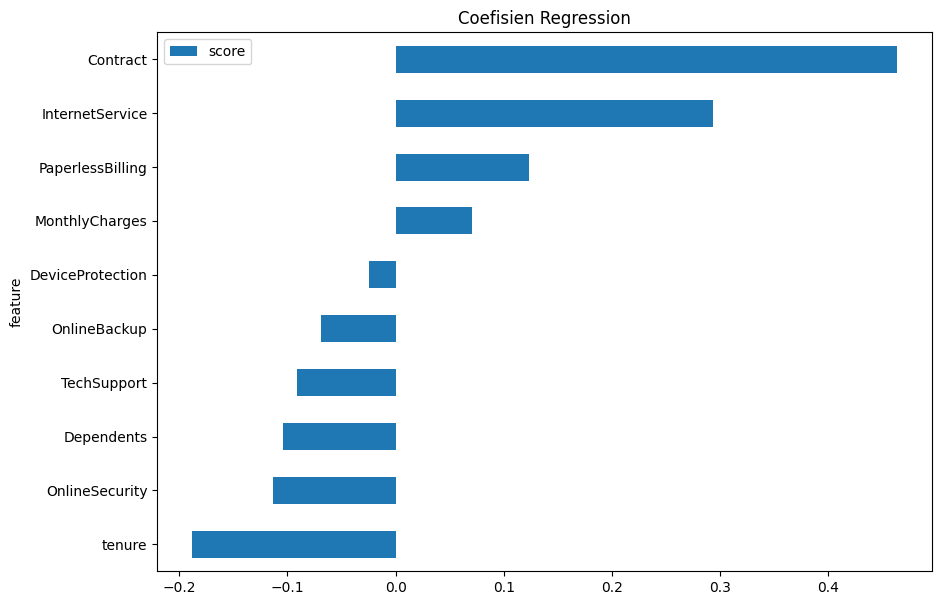

In [49]:
feature_imp = pd.DataFrame()

feature_imp['feature'] = ['tenure', 'MonthlyCharges', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'InternetService', 'Contract']
feature_imp['score'] = grid_search_cv_balance_logreg_opt.best_estimator_.named_steps['clf'].coef_.reshape(-1, 1)
feature_imp = feature_imp.set_index('feature')
feature_imp.sort_values('score', ascending=True).plot(kind='barh', figsize=(10, 7))
plt.title('Coefisien Regression')
plt.show()

In [50]:
feature_imp.sort_values(by='score',ascending=False)

,score
feature,
Contract,0.463423
InternetService,0.293470
PaperlessBilling,0.123337
MonthlyCharges,0.070762
DeviceProtection,-0.024472
OnlineBackup,-0.069244
TechSupport,-0.091027
Dependents,-0.104519
OnlineSecurity,-0.113703


Berdasarkan plot, Koefisien bernilai positif untuk variabel Contract adalah yang tertinggi. Ini menunjukkan bahwa kontrak pelanggan adalah faktor yang paling penting dalam memprediksi kemungkinan pelanggan berhenti berlangganan.

Nilai Koefisien bernilai positif untuk variabel Contract juga menunjukkan bahwa pengaruhnya lebih besar untuk pelanggan dengan kontrak bulanan. Ini dapat dijelaskan dengan fakta bahwa pelanggan dengan kontrak bulanan memiliki lebih banyak pilihan untuk pindah ke penyedia layanan lain.

In [51]:
dfa.groupby(['Contract','Churn']).agg({'Churn':'count'})

Churn
Contract       Churn       
Month-to-month No      1543
               Yes     1178
One year       No       946
               Yes      106
Two year       No      1125
               Yes       32

Koefisien bernilai positif untuk variabel InternetService adalah yang kedua tertinggi. Ini menunjukkan bahwa layanan internet pelanggan adalah faktor yang penting dalam memprediksi kemungkinan pelanggan berhenti berlangganan.

Nilai Koefisien positif untuk variabel InternetService juga menunjukkan bahwa pengaruhnya lebih besar untuk pelanggan dengan layanan internet Fiber optic. Ini dapat dijelaskan dengan fakta bahwa pelanggan dengan layanan internet Fiber optic memiliki pilihan untuk pindah ke penyedia layanan lain alias **churn**.

In [52]:
dfa.groupby(['InternetService','Churn']).agg({'Churn':'count'})

Churn
InternetService Churn       
DSL             No      1388
                Yes      318
Fiber optic     No      1256
                Yes      916
No              No       970
                Yes       82

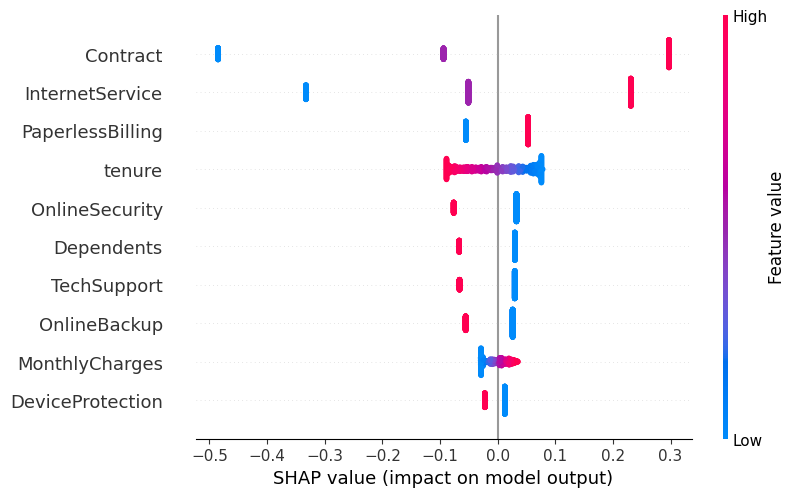

In [53]:
import shap

transformer2 = ColumnTransformer(
    [
     ('scaling', MinMaxScaler(), ['tenure','MonthlyCharges']),
     ('OHE', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']),
     ('ordinal', ce.OrdinalEncoder(cols=['InternetService', 'Contract'], mapping=ordinal_mapping), ['InternetService', 'Contract'])
     ], remainder='passthrough'
)

log_fix = LogisticRegression(
    class_weight='balanced',
    random_state=22,
    C = 0.001,
    max_iter= 100,
    penalty='l2',
    solver='lbfgs'
)

transformer2.fit(x_train)
x_train_pp = transformer2.transform(x_train)
x_train_pp = pd.DataFrame(x_train_pp, columns=transformer2.get_feature_names_out())
x_test_pp = transformer2.transform(x_test)

log_fix.fit(x_train_pp, y_train)

explainer = shap.Explainer(
    log_fix, x_train_pp, feature_names=['tenure', 'MonthlyCharges', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'InternetService', 'Contract']
)

shap_values = explainer(x_test_pp)

shap.plots.beeswarm(shap_values)

**Interpretasi**

1. Berdasarkan grafik koefisien regresi di atas, kita dapat menyimpulkan bahwa fitur Contract, khususnya opsi month-to-month, memiliki dampak yang signifikan terhadap keputusan pelanggan.

2. Dalam hal fitur InternetService, terutama opsi Fiber Optic, terlihat bahwa ini memiliki pengaruh yang lebih besar terhadap keputusan pelanggan untuk beralih ke penyedia layanan lain atau mengalami churn.

3. Demikian pula, fitur MonthlyCharges juga memiliki dampak yang cukup besar; semakin tinggi harga bulanan, semakin besar kemungkinan pelanggan untuk memutuskan berpindah ke penyedia layanan lain atau mengalami churn.

In [54]:
y_pred_bef_tuning = grid_search_cv_balance.predict(x_test)
y_pred_after_tuning = grid_search_cv_balance_logreg_opt.predict(x_test)

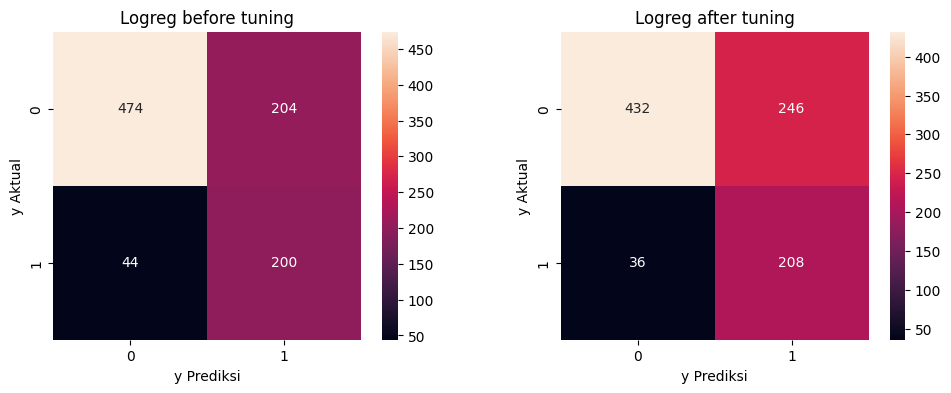

In [55]:
plt.figure(figsize=(12,4))

# Model LogregBoost before tuning
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_bef_tuning), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Logreg before tuning')

# Model LogregBoost after tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_after_tuning), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Logreg after tuning');

Berdasarkan confusion matrix pada kumpulan data uji di atas, model `logistic regression` yang telah dibuat menghasilkan hasil berikut:

- Jumlah pelanggan yang sebenarnya churn dan diprediksi churn (True Positive): 208 orang
- Jumlah pelanggan yang sebenarnya churn tetapi diprediksi tidak churn (False Negative): 36 orang
- Jumlah pelanggan yang sebenarnya tidak churn dan diprediksi tidak churn (True Negative): 432 orang
- Jumlah pelanggan yang sebenarnya tidak churn tetapi diprediksi churn (False Positive): 246 orang
- Jumlah pelanggan yang diprediksi churn: 208 + 246 = 454 orang
- Jumlah pelanggan yang diprediksi tidak churn: 432 + 36 = 468 orang

In [56]:
y_pred_test_logreg = grid_search_cv_balance_logreg_opt.predict(x_test)

print(classification_report(y_test, y_pred_test_logreg))

print('F2 score test after tuning :', fbeta_score(y_test, y_pred_test_logreg, beta=2))


              precision    recall  f1-score   support

           0       0.92      0.64      0.75       678
           1       0.46      0.85      0.60       244

    accuracy                           0.69       922
   macro avg       0.69      0.74      0.67       922
weighted avg       0.80      0.69      0.71       922

F2 score test after tuning : 0.7272727272727272


**Recall**

Recall mengukur kemampuan model untuk memprediksi kelas positif dengan benar. Dalam kasus ini, kelas positif adalah pelanggan yang churn. False negative adalah pelanggan yang diprediksi tidak churn, padahal sebenarnya churn. Jadi, nilai recall menunjukkan persentase pelanggan churn yang diprediksi dengan benar.

Nilai recall 85% berarti, dari 244 pelanggan churn, 207 di antaranya diprediksi dengan benar.

Recall cocok digunakan jika cost untuk False Negative dinilai tinggi. Jika kita menggunakan metric recall, itu berarti kita berusaha untuk meminimalkan jumlah false negative yang dihasilkan oleh model, seperti dalam kasus ini kita minimalkan menjadi hanya 36 orang saja.

**Precision**

Nilai precision 46% berarti, dari 454 pelanggan yang diprediksi churn, hanya 208 di antaranya benar-benar churn. Hal ini menunjukkan bahwa model cenderung memprediksi terlalu banyak pelanggan sebagai churn, bahkan jika mereka sebenarnya tidak churn.

**F2-score**

Metrik F2-score menggambarkan rata-rata harmonik dari nilai precision dan recall. Dengan menetapkan nilai beta = 2 , kita menganggap recall dua kali lebih penting daripada precision. Rumus **F2 = ((1 + β²) * precision * recall) / ((β² * precision) + recall)** = 5 x 46% x 85% / (4 * 46% + 85%) = 72.72%

***Cost Estimation***

Berdasarkan asumsi yang telah disampaikan pada bagian Business Understanding, kita asumsikan dampak biayanya sebagai berikut :

Biaya retensi per pelanggan --> $12.6 per bulan per pelanggan <br>
Asumsi persentase customer yang tetap bertahan (tidak jadi churn) akibat program retensi : 40% [(sumber)](https://jungleworks.com/how-to-reduce-churn-rate-and-increase-customer-retention/)<br>
Biaya akibat kehilangan pelanggan (Churn) --> $127.88 per bulan per pelanggan (total pendapatan yang hilang dan biaya Customer Acquisition Cost)

Jumlah pelanggan untuk dasar perhitungan :

Pelanggan yang diberikan program retensi adalah seluruh pelanggan yang diprediksi akan Churn = TP + FP = 454 orang
Pelanggan yang tetap bertahan (tidak jadi churn) akibat program retensi = 40% x TP = 40% x 208 = 83 orang
Pelanggan yang churn = FN + TP - Pelanggan yang tetap bertahan (tidak jadi churn) akibat program retensi = 36 + 208 - 83 = 161 orang

Cost Estimation

(454 orang x 12.6) + (161 orang x 127.88) = (5720.4 + 20.588,68) = $26,309.08 Maka kerugiannya sekitar $26,309.08 per bulan untuk 922 pelanggan.

# *FINAL MODEL - Adaboost Classifier AS EXPLAINABLE ML*

Model terbaik untuk expalinable Machine Learning yang akan kita pakai adalah **Adaboost Classifier** yang telah dituning.

**Adaboost Classifier** adalah algoritma ensemble learning yang digunakan untuk meningkatkan kinerja model prediksi dengan menggabungkan beberapa model prediksi lemah [(weak learners)](https://medium.com/@desardaakash/understanding-adaboost-2f94f22d5bfe) menjadi satu model yang lebih kuat. Algoritma ini bekerja dengan memberikan bobot pada setiap model prediksi lemah dan menggabungkan hasil prediksi mereka untuk menghasilkan prediksi akhir.

In [57]:
from sklearn.inspection import permutation_importance

result = permutation_importance(grid_search_ada_opt, x_train, y_train)

feature_importances = result['importances_mean']

feature_importances

array([-0.00384979,  0.0063212 , -0.00032422,  0.00441415,  0.05089711,
       -0.00038278,  0.00240887,  0.16563471, -0.00306888, -0.00100336])

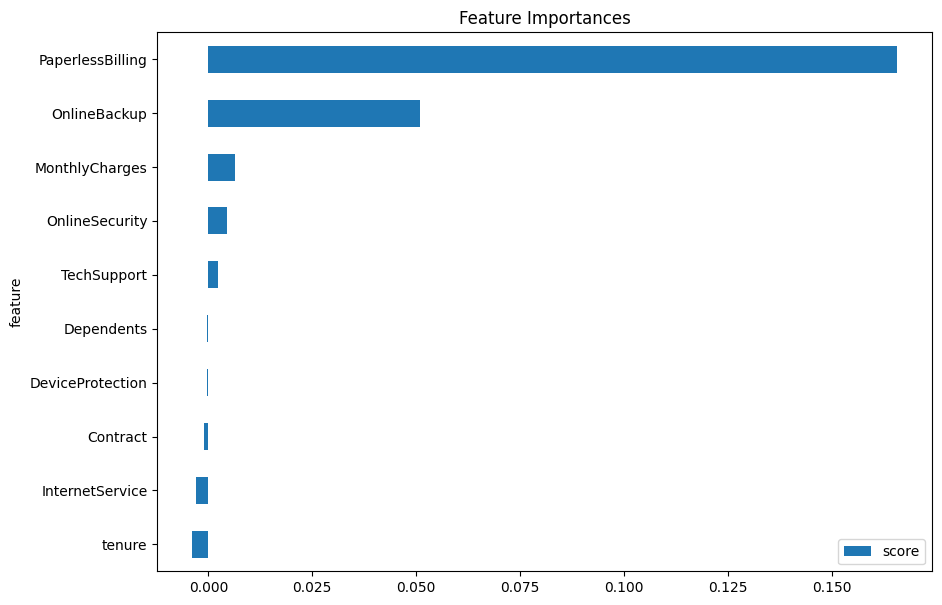

In [58]:
feature_imp = pd.DataFrame()

feature_imp['feature'] = ['tenure', 'MonthlyCharges', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'InternetService', 'Contract']
feature_imp['score'] = feature_importances
feature_imp = feature_imp.set_index('feature')
feature_imp.sort_values('score', ascending=True).plot(kind='barh', figsize=(10, 7))
plt.title('Feature Importances')
plt.show()

Terlihat bahwa ternyata untuk model Adaboost Classifier kita, fitur/kolom **PaperlessBilling** adalah yang paling penting, kemudian diikuti dengan **OnlineBackup**. Sedangkan fitur seperti **MonthlyCharges**, **OnlineSecurity**, **TechSupport** dan **Contract** dianggap tidak begitu penting.

Hal ini cukup berbeda dengan model Logistic Regression kita sebelumnya, dimana fitur yang pentingnya hanya **Contract**, **PaperlessBilling**, **InternetService** dan **MonthlyCharges**.

In [59]:
import shap

transformer2 = ColumnTransformer(
    [
     ('scaling', MinMaxScaler(), ['tenure','MonthlyCharges']),
     ('OHE', OneHotEncoder(drop='first'), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']),
     ('ordinal', ce.OrdinalEncoder(cols=['InternetService', 'Contract'], mapping=ordinal_mapping), ['InternetService', 'Contract'])
     ], remainder='passthrough'
)

log_fix = AdaBoostClassifier(
    estimator=LogisticRegression(class_weight='balanced', random_state=22),
    random_state=22,
    algorithm='SAMME',
    learning_rate=1.04,
    n_estimators=50
)

transformer2.fit(x_train)
x_train_pp = transformer2.transform(x_train)
x_train_pp = pd.DataFrame(x_train_pp, columns=transformer2.get_feature_names_out())
x_test_pp = transformer2.transform(x_test)

log_fix.fit(x_train_pp, y_train)

explainer = shap.explainers.Permutation(log_fix.predict_proba, x_train_pp)
shap_values = explainer(x_train_pp)

shap_values2 = shap_values[..., 1]
shap_values2.shape

PermutationExplainer explainer: 3689it [02:44, 21.57it/s]                          


(3688, 10)

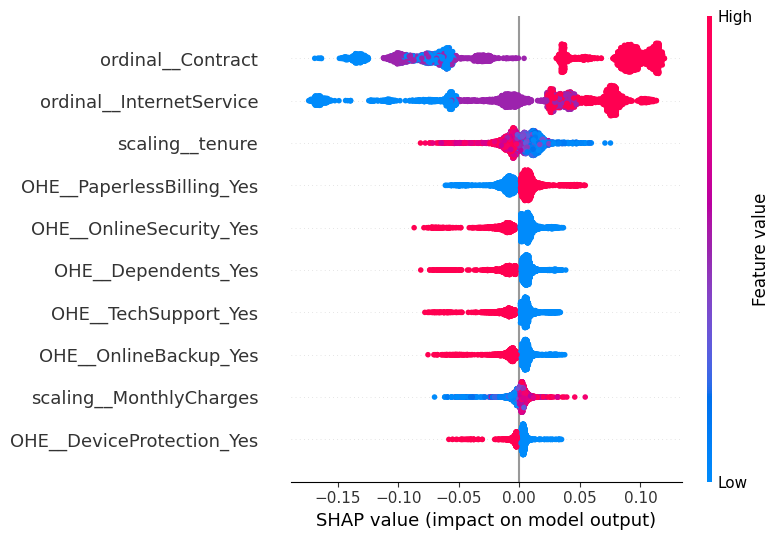

In [60]:
shap.summary_plot(shap_values2, x_train_pp, feature_names=transformer2.get_feature_names_out())

Berdasarkan SHAP value, kita dapat melihat bahwa fitur yang paling penting diantaranya:

- Contract
- MonthlyCharges
- PaperlessBilling
- InternetService

Hal ini sedikit berbeda dengan hasil berdasarkan feature importance

**Interpretasi**

- Konsumen yang memilih Contract Month-to-month (berwarna merah - 3) memiliki kecenderungan tingkat Churn yang lebih tinggi. Sebaliknya, semakin lama kontraknya, baik One-year (berwarna ungu - 2) maupun Two-year (berwarna biru - 1), maka semakin rendah kemungkinan Churn.
- Semakin tinggi MonthlyCharges (berwarna merah), semakin besar probabilitas konsumen mengalami Churn.
- Tenure yang lebih pendek (berwarna biru) berhubungan dengan kemungkinan Churn yang lebih tinggi.
- Pengguna InternetService Fiber optic (berwarna merah - 3) cenderung memiliki tingkat Churn yang lebih tinggi dibandingkan dengan pengguna DSL atau tidak menggunakan layanan internet sama sekali. Bahkan, pelanggan tanpa layanan InternetService memiliki kecenderungan untuk tidak mengalami Churn.
- Konsumen tanpa OnlineSecurity (berwarna biru - 0) cenderung memiliki tingkat Churn yang lebih tinggi dibandingkan dengan yang menggunakan OnlineSecurity.

In [61]:
y_pred_bef_tuning = grid_search_cv_balance_ensemble.predict(x_test)
y_pred_after_tuning = grid_search_ada_opt.predict(x_test)

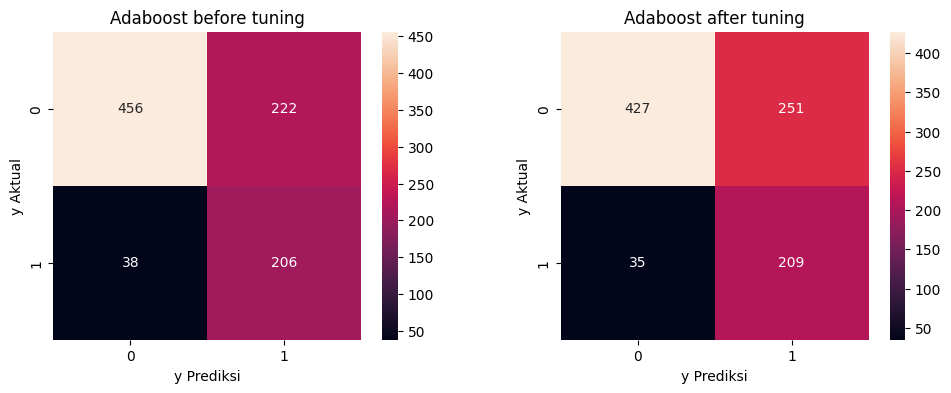

In [62]:
plt.figure(figsize=(12,4))

# Model adaboost before tuning
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_bef_tuning), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Adaboost before tuning')

# Model adaboost after tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_after_tuning), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Adaboost after tuning');

Berdasarkan confusion matrix pada kumpulan data uji di atas, model `adaboost` yang telah dibuat menghasilkan hasil berikut:

- Jumlah pelanggan yang sebenarnya churn dan diprediksi churn (True Positive): 209 orang
- Jumlah pelanggan yang sebenarnya churn tetapi diprediksi tidak churn (False Negative): 35 orang
- Jumlah pelanggan yang sebenarnya tidak churn dan diprediksi tidak churn (True Negative): 427 orang
- Jumlah pelanggan yang sebenarnya tidak churn tetapi diprediksi churn (False Positive): 251 orang
- Jumlah pelanggan yang diprediksi churn: 209 + 251 = 460 orang
- Jumlah pelanggan yang diprediksi tidak churn: 427 + 35 = 462 orang

In [63]:
y_pred_after_tuning = grid_search_ada_opt.predict(x_test)

print(classification_report(y_test, y_pred_after_tuning))

print('F2 score test after tuning :', fbeta_score(y_test, y_pred_after_tuning, beta=2))


              precision    recall  f1-score   support

           0       0.92      0.63      0.75       678
           1       0.45      0.86      0.59       244

    accuracy                           0.69       922
   macro avg       0.69      0.74      0.67       922
weighted avg       0.80      0.69      0.71       922

F2 score test after tuning : 0.7277158774373259


**Recall**

Recall mengukur kemampuan model untuk memprediksi kelas positif dengan benar. Dalam kasus ini, kelas positif adalah pelanggan yang churn. False negative adalah pelanggan yang diprediksi tidak churn, padahal sebenarnya churn. Jadi, nilai recall menunjukkan persentase pelanggan churn yang diprediksi dengan benar.

Nilai recall 86% berarti, dari 244 pelanggan churn, 209 di antaranya diprediksi dengan benar.

Recall cocok digunakan jika cost untuk False Negative dinilai tinggi. Jika kita menggunakan metric recall, itu berarti kita berusaha untuk meminimalkan jumlah false negative yang dihasilkan oleh model, seperti dalam kasus ini kita minimalkan menjadi hanya 35 orang saja.

**Precision**

Nilai precision 45% berarti, dari 460 pelanggan yang diprediksi churn, hanya 209 di antaranya benar-benar churn. Hal ini menunjukkan bahwa model cenderung memprediksi terlalu banyak pelanggan sebagai churn, bahkan jika mereka sebenarnya tidak churn.

**F2-score**

Metrik F2-score menggambarkan rata-rata harmonik dari nilai precision dan recall. Dengan menetapkan nilai beta = 2 , kita menganggap recall dua kali lebih penting daripada precision. Rumus **F2 = ((1 + β²) * precision * recall) / ((β² * precision) + recall)** = 5 x 45% x 86% / (4 * 45% + 86%) = 72.77%

***Cost Estimation***

Berdasarkan asumsi yang telah disampaikan pada bagian Business Understanding, kita asumsikan dampak biayanya sebagai berikut :

Biaya retensi per pelanggan --> $12.6 per bulan per pelanggan <br>
Asumsi persentase customer yang tetap bertahan (tidak jadi churn) akibat program retensi : 40% [(sumber)](https://jungleworks.com/how-to-reduce-churn-rate-and-increase-customer-retention/)<br>
Biaya akibat kehilangan pelanggan (Churn) --> $127.88 per bulan per pelanggan (total pendapatan yang hilang dan biaya Customer Acquisition Cost)

Jumlah pelanggan untuk dasar perhitungan :

Pelanggan yang diberikan program retensi adalah seluruh pelanggan yang diprediksi akan Churn = TP + FP = 454 orang
Pelanggan yang tetap bertahan (tidak jadi churn) akibat program retensi = 40% x TP = 40% x 209 = 84 orang
Pelanggan yang churn = FN + TP - Pelanggan yang tetap bertahan (tidak jadi churn) akibat program retensi = 35 + 209 - 84 = 160 orang

Cost Estimation

(454 orang x 12.6) + (160 orang x 127.88) = (5720.4 + 20.460,8) = $26,181.2 Maka kerugiannya sekitar $26,181.2 per bulan untuk 922 pelanggan.



***Cost Estimation tanpa machine learning***

Saat kita tidak menggunakan machine learning, kita tidak dapat memprediksi pelanggan yang akan Churn atau tidak. Dampaknya adalah kita cenderung untuk memberi program retensi kepada seluruh Pelanggan.

Jumlah pelanggan untuk dasar perhitungan :

Pelanggan yang diberikan program retensi adalah seluruh pelanggan yang diprediksi akan Churn = TP + FP = 922 orang
Pelanggan yang tetap bertahan (tidak jadi churn) akibat program retensi = 40% x TP = 40% x 244 = 98 orang
Pelanggan yang churn = FN + TP - Pelanggan yang tetap bertahan (tidak jadi churn) akibat program retensi = 0 + 244 - 98 = 146 orang

Cost Estimation

(922 orang x 12.6) + (146 orang x 127.88) = (11,617.2 + 18,670.48) = $30,287.68 Maka kerugiannya sekitar $30,287.68 per bulan untuk 922 pelanggan.

# CONCLUSION & RECOMMENDATION

## *Conclusion*

- Metric utama yang akan kita gunakan adalah f2_score, karena recall kita anggap dua kali lebih penting daripada precision.

- Berdasarkan pemodelan Logistic Regression, fitur/kolom **Contract** adalah yang paling penting dan berpengaruh terhadap target (Churn), kemudian diikuti dengan **PaperlessBilling**, **InternetService** dan **MonthlyCharges**.

- Berdasarkan contoh perhitungan biaya :
  
  - Potensi kerugian yang mungkin didapat tanpa adanya penerapan machine learning diperkirakan sebesar : $30,287.68 per bulan untuk 922 pelanggan

  - Potensi kerugian yang mungkin didapat dengan menerapkan model Logistic Regression yang telah dibuat diperkirakan sebesar : $26,309.08 per bulan untuk 922 pelanggan

  - Potensi kerugian yang mungkin didapat dengan menerapkan model Adaboost Classifier yang telah dibuat diperkirakan sebesar : $26,181.2 per bulan untuk 922 pelanggan.

- Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model kita, maka perusahaan dapat menghemat sebesar :

  - Dengan Model Logistic Regression : $3978.59 per bulan untuk 922 pelanggan.

  - Dengan Model Adaboost Classifier : $4106.48 per bulan untuk 922 pelanggan.

  - Memperhitungkan bahwa jumlah pelanggan pada penyedia layanan telekomunikasi dapat mencapai jutaan, tentunya potensi penghematan akan semakin signifikan jika karakteristik pelanggan masih mencakup rentang data yang digunakan dalam proses pemodelan.


**Model Limitation**

Model ini hanya berlaku pada rentang data yang digunakan pada pemodelan ini yaitu :

- tenure antara 0 sampai dengan 72 bulan
- MonthlyCharges antara 18.8 sampai dengan 118.65
- Contract dalam jangka Month-to-month, One year, dan Two Year
- InternetService berupa 'DSL', 'Fiber Optic' dan 'No'
- Dependent, Paperless Billing dengan nilai 'Yes' atau 'No'
- OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport berisi pilihan 'Yes', 'No' atau 'No internet service'.

Pada kasus ini, analisis dan hasil prediksi dari model yang telah dibuat tidak valid untuk :

- tenure lebih besar dari 72 bulan
- MonthlyCharges kurang dari 18.8 atau lebih besar dari 118.65
- Jenis Contract selain Month-to-month, One year, dan Two Year
- InternetService selain 'DSL', 'Fiber Optic' dan 'No'
- Dependent, Paperless Billing dengan nilai selain 'Yes' atau 'No'
- OnlineSecurity, OnlineBackup, DeviceProtection, dan TechSupport berisi pilihan selain 'Yes', 'No' atau 'No internet service'.



## *Recommendation*

Beberapa tindakan yang dapat diambil oleh perusahaan untuk mengurangi jumlah pelanggan yang akan berhenti berlangganan (churn) meliputi:
- Menawarkan insentif atau penghargaan yang menarik bagi pelanggan untuk beralih dari kontrak bulanan ke kontrak tahunan atau dua tahunan.
- Membuat program loyalitas pelanggan untuk mendorong pelanggan agar tetap berlangganan dan memiliki masa berlangganan yang lama. Program ini dapat berupa pemberian penghargaan yang besarannya disesuaikan dengan masa berlangganan. Semakin lama masa berlangganan, semakin besar penghargaan yang bisa didapat, sehingga mendorong pelanggan untuk memiliki masa berlangganan yang lebih lama.
- Melakukan survei kepuasan pelanggan secara berkala untuk mengetahui kualitas layanan yang telah diberikan dan melakukan perbaikan jika ada umpan balik negatif.


Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi diantaranya: 

- Menambahkan fitur-fitur atau kolom baru yang dapat mengukur kepuasan pelanggan terhadap masing-masing layanan. Hal ini dapat membantu untuk mengidentifikasi apakah churn disebabkan oleh kualitas layanan yang buruk.
- Menambahkan fitur-fitur atau kolom baru yang dapat memberikan gambaran tentang penggunaan produk-produk yang ada oleh pelanggan. Dengan demikian, perusahaan dapat melakukan segmentasi pelanggan untuk menentukan produk yang paling sesuai untuk ditawarkan.
- Menambahkan data untuk kelas minoritas (Churn). Hal ini dapat membantu untuk meningkatkan performa model karena model akan memiliki lebih banyak data untuk dipelajari.
- Mencoba algoritma ML dan teknik tuning parameter yang berbeda, serta menggunakan teknik oversampling yang berbeda. Dengan demikian, perusahaan dapat menemukan kombinasi yang paling optimal untuk meningkatkan performa model.
- Menganalisis data-data yang salah diprediksi oleh model. Hal ini dapat membantu untuk mengidentifikasi alasan dan karakteristik data yang salah diprediksi.

In [64]:
feature = dfa.drop(columns='Churn')
target = dfa['Churn']
target = np.where(target == 'Yes', 1, 0)
target

array([1, 0, 1, ..., 0, 1, 0])

In [65]:
import pickle

model_ada_fix = grid_search_ada_opt.best_estimator_
model_ada_fix.fit(feature,target)

# save with pickle
pickle.dump(model_ada_fix, open('best_model_adaboost.sav', 'wb'))

In [66]:
import pickle

model_logreg_fix = grid_search_cv_balance_logreg_opt.best_estimator_
model_logreg_fix.fit(feature,target)

# save with pickle
pickle.dump(model_logreg_fix, open('best_model_logreg.sav', 'wb'))

In [67]:
#   load model coba
filename = 'best_model_logreg.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [68]:
hasil = loaded_model.predict(feature)

fbeta_score(target, hasil, beta=2)

0.729330193615908